In [1]:
import pickle as pkl
import sys
sys.path.append('../motif_id/')
import interp_utils
import h5py
import glob
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import model_selection
model_list = ['CNN','gpn','NT']

## Plotting

In [2]:
def plot_collective_saliency(top_x,saliency_pattern,sal_index,model = model_list):
    collective_saliency = []
    for model in model_list:
        sal_f = '../motif_id/top_saliency/'+model+saliency_pattern
        saliency = np.load(sal_f)
        collective_saliency.append(saliency['arr_1'][sal_index])
    for i in range(len(collective_saliency[0])):
        fig, axs = plt.subplots(3, 1, figsize=[20, 2*3],sharex = False, sharey= False)
        interp_utils.plot_value_per_loc(top_x[i:i+1],collective_saliency[0][i:i+1],ax = axs[0])
        interp_utils.plot_value_per_loc(top_x[i:i+1],collective_saliency[1][i:i+1],ax = axs[1])
        interp_utils.plot_value_per_loc(top_x[i:i+1],collective_saliency[2][i:i+1],ax = axs[2])
    plt.show()
    

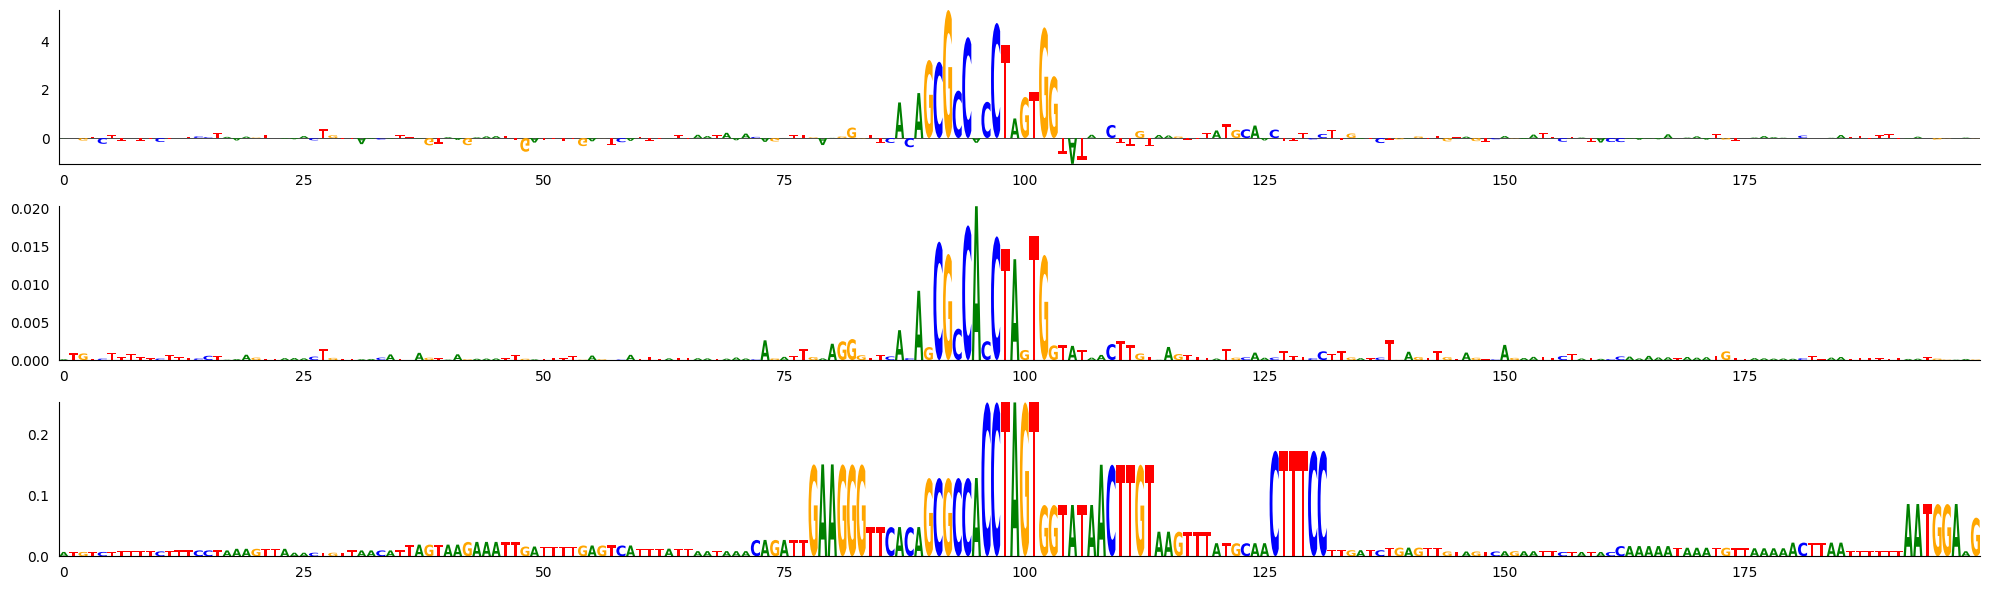

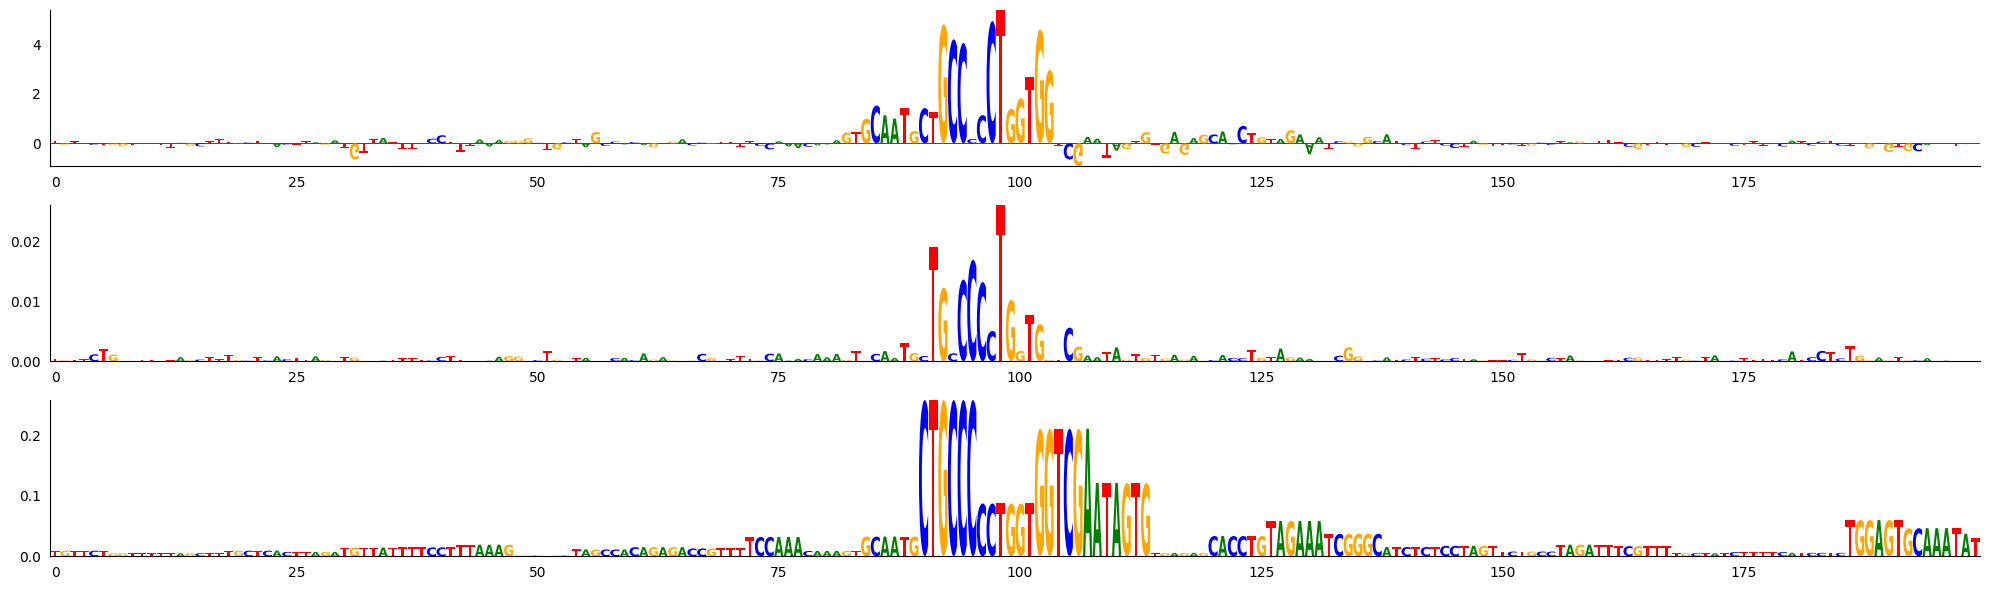

In [4]:
## Chip
count = 2
#sal_index = np.random.choice(500,count,replace=False)
sal_index = range(count)
exp = 'CTCF'
top_x = np.load('../motif_id/top_seq/chip/'+exp+'.npz')['arr_0']
top_x = top_x[sal_index]
top_x = np.swapaxes(top_x,1,2)
plot_collective_saliency(top_x,'_chip_'+exp+'.npz',sal_index)

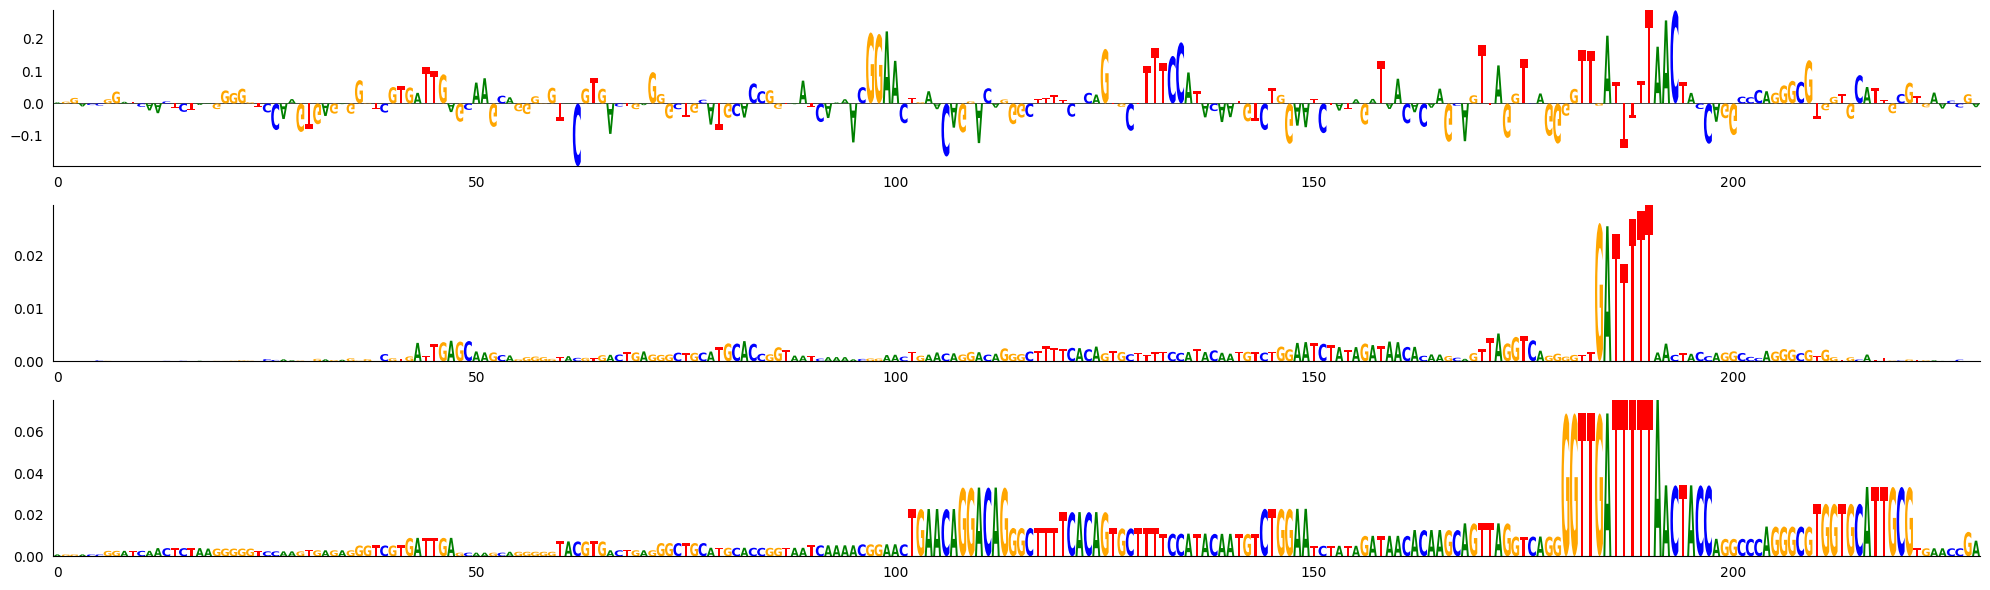

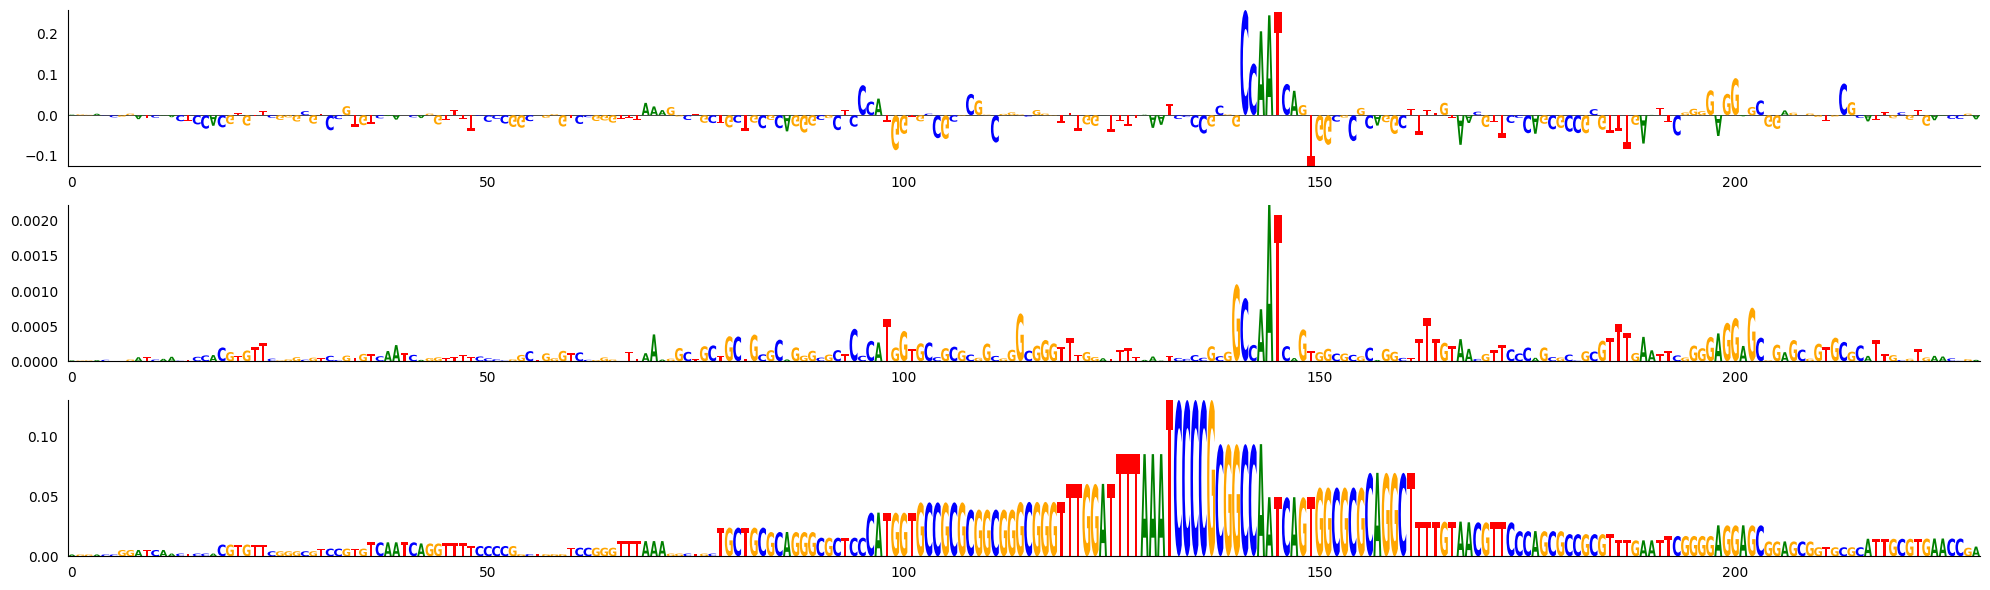

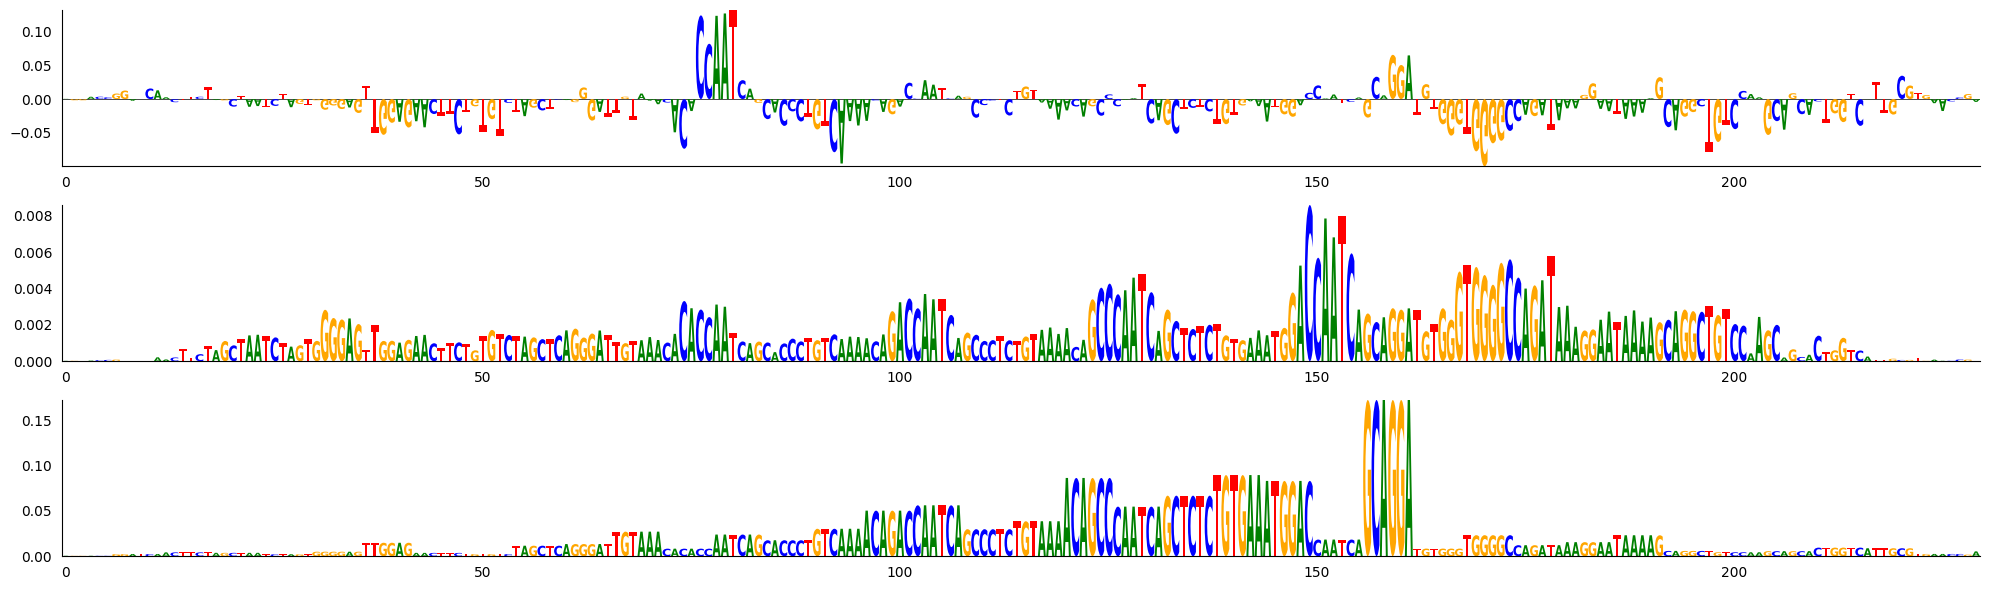

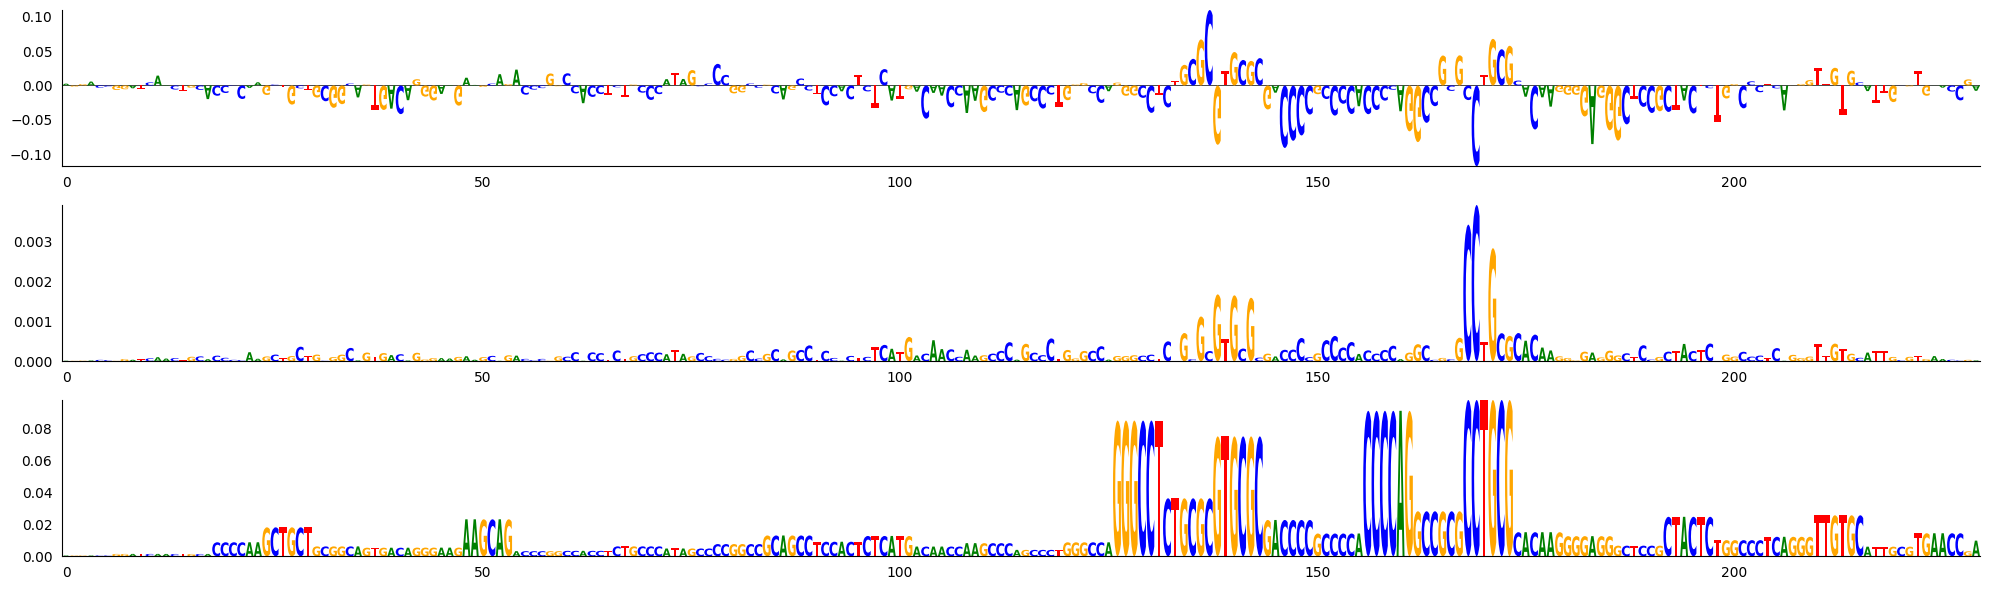

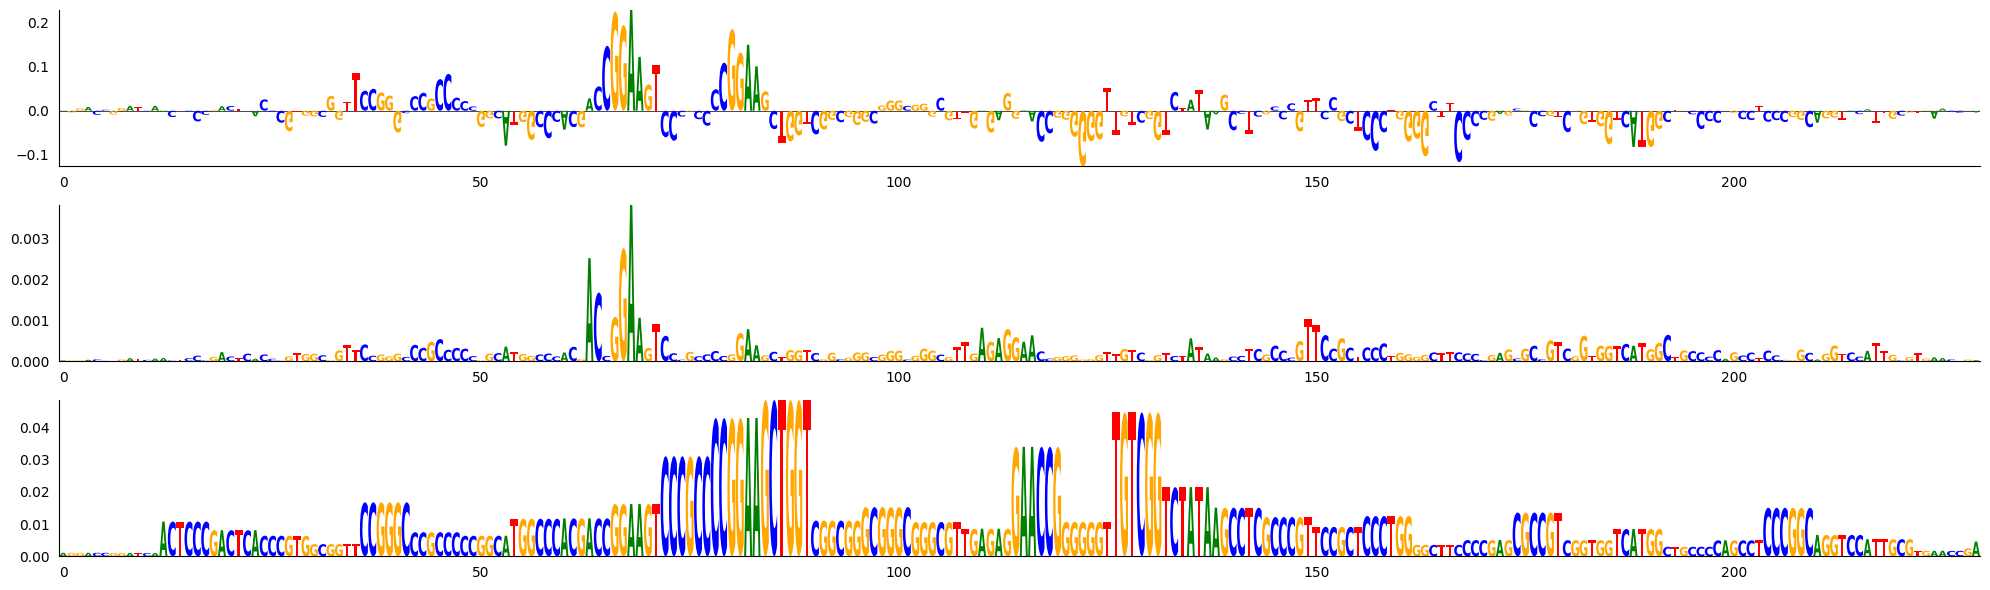

In [13]:
## Lenti
count = 5
sal_index = np.random.choice(500,count,replace=False)
#sal_index = range(count)
ct = 'HepG2'
top_x = np.load('../motif_id/top_seq/lenti_'+ct+'.npz')['arr_0']
top_x = top_x[sal_index]
top_x = np.swapaxes(top_x,1,2)
plot_collective_saliency(top_x,'_lenti_'+ct+'.npz',sal_index)

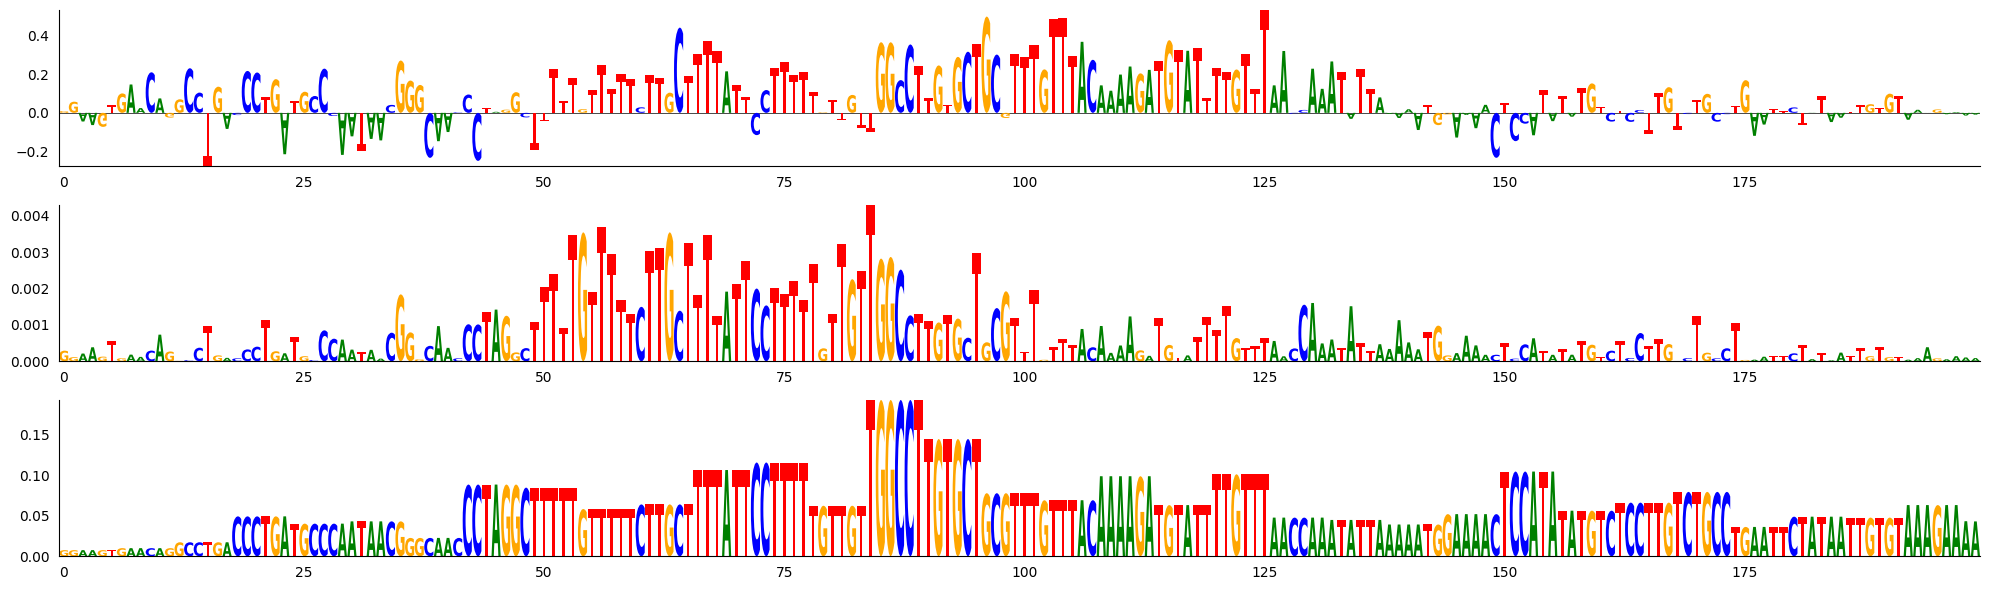

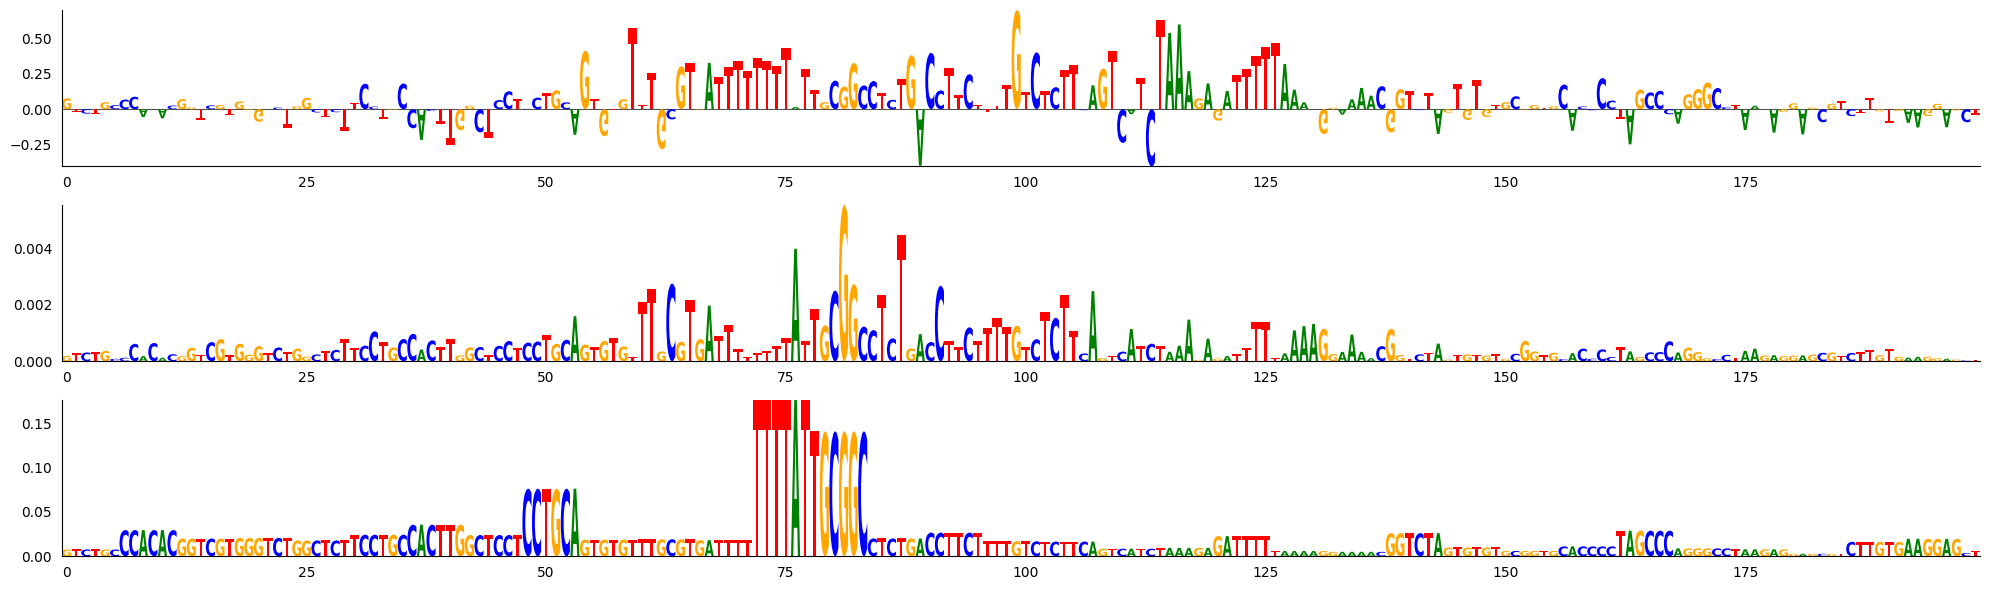

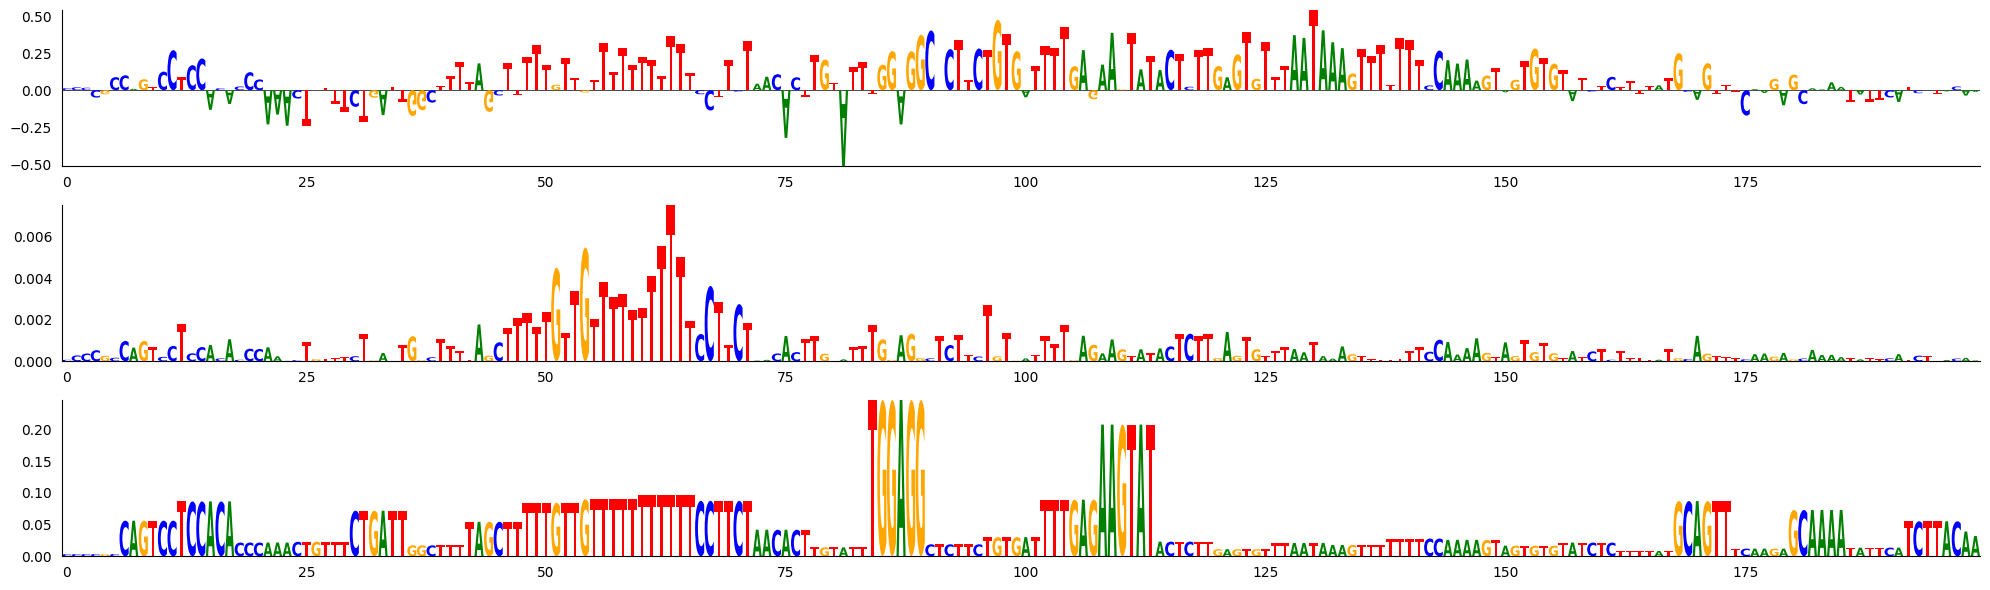

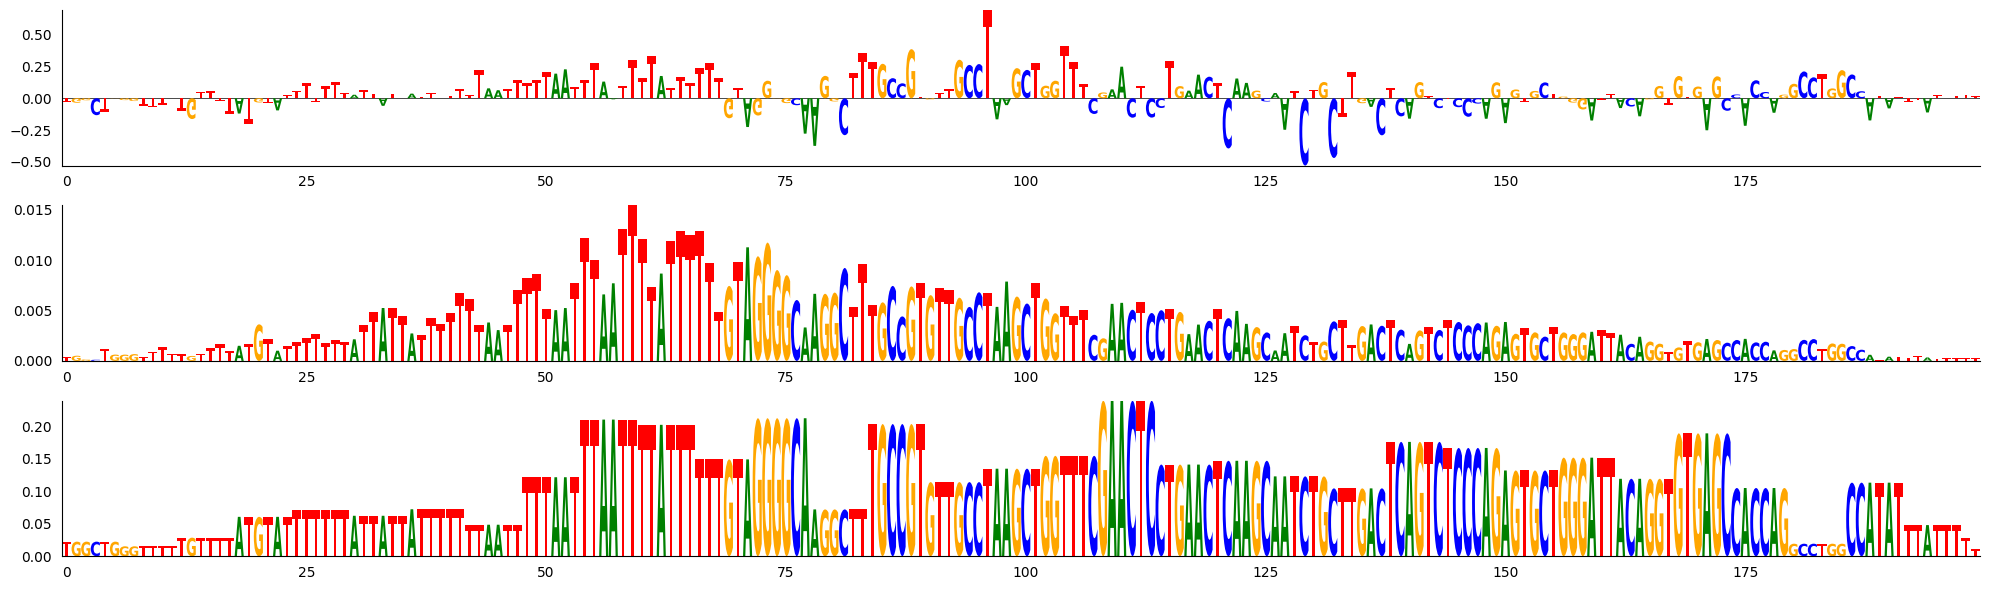

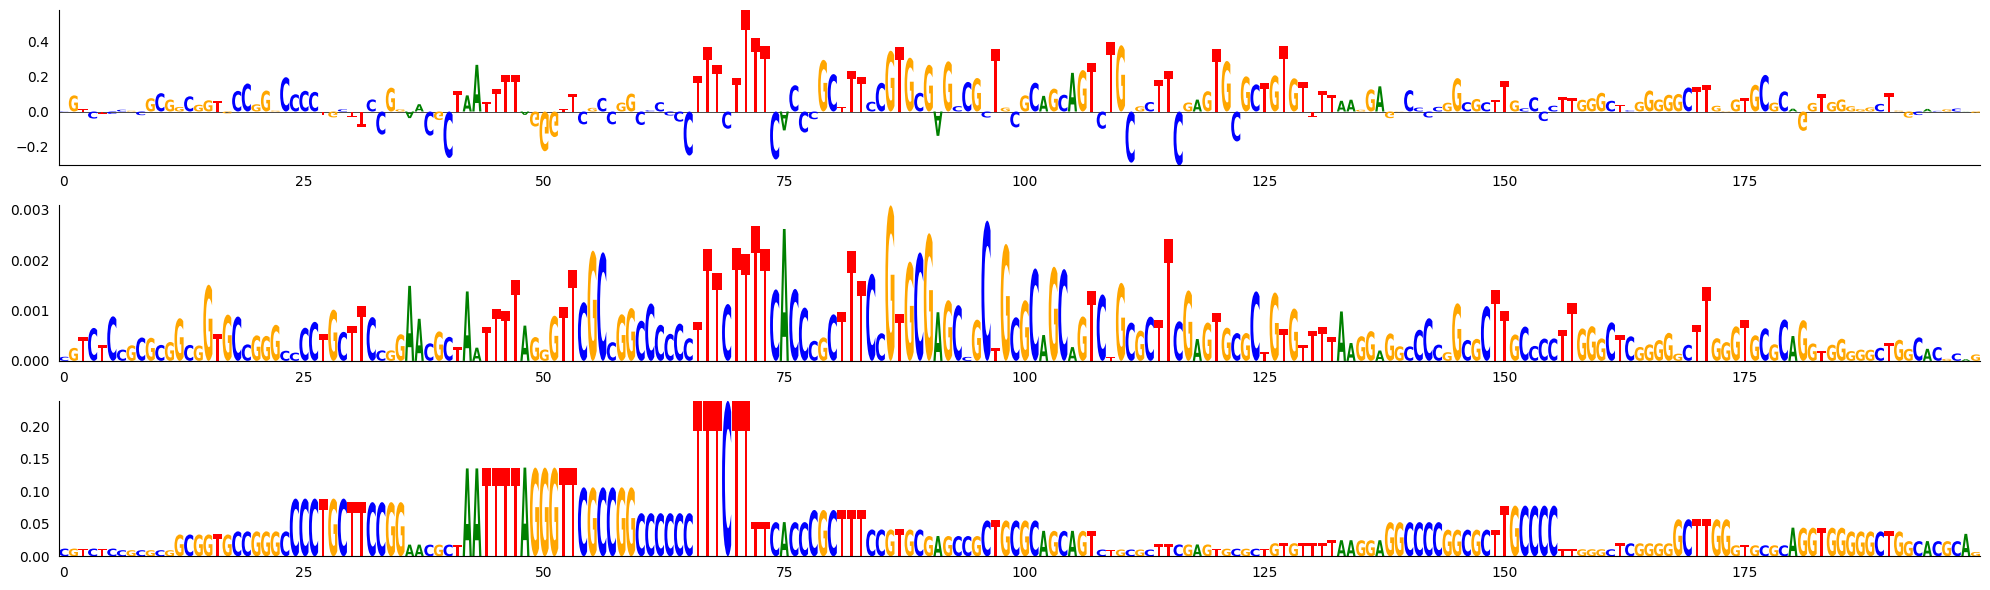

In [9]:
## Clip
count = 5
#sal_index = np.random.choice(500,count,replace=False)
sal_index = range(count)
exp = 'TIA1'
top_x = np.load('../motif_id/top_seq/clip/'+exp+'.npz')['arr_0']
top_x = top_x[sal_index]
top_x = np.swapaxes(top_x,1,2)
plot_collective_saliency(top_x,'_clip_'+exp+'.npz',sal_index)

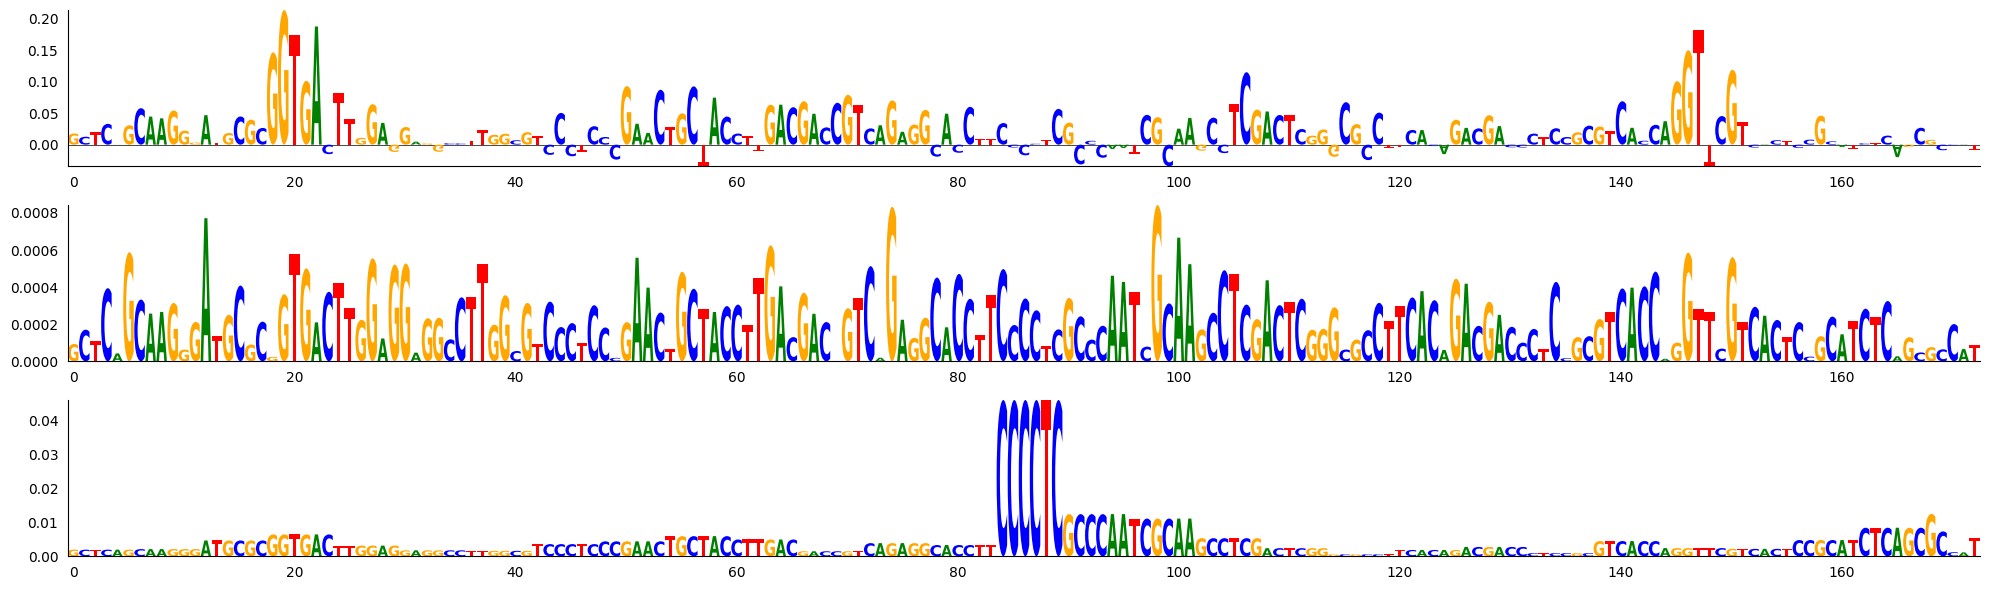

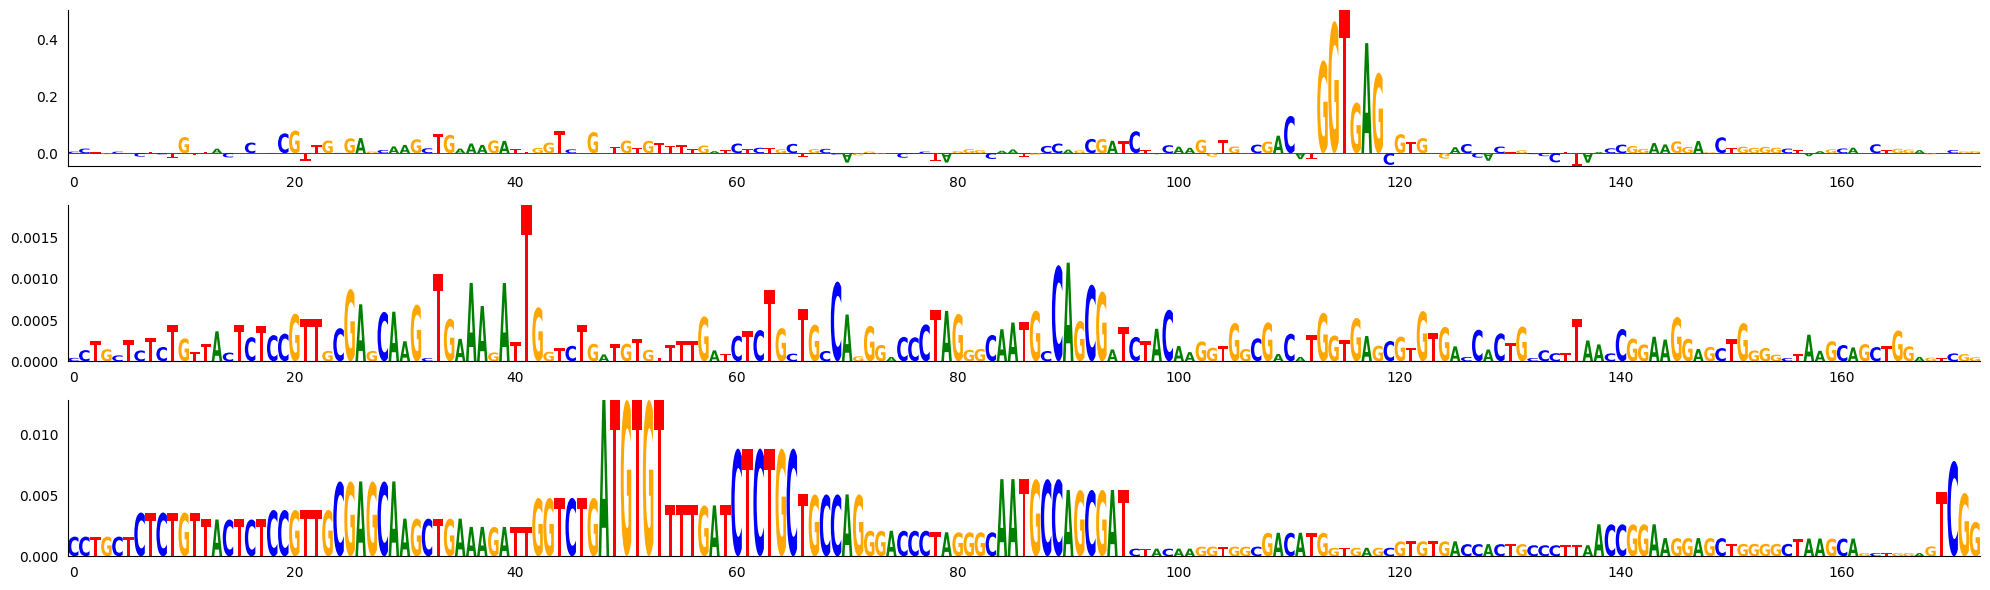

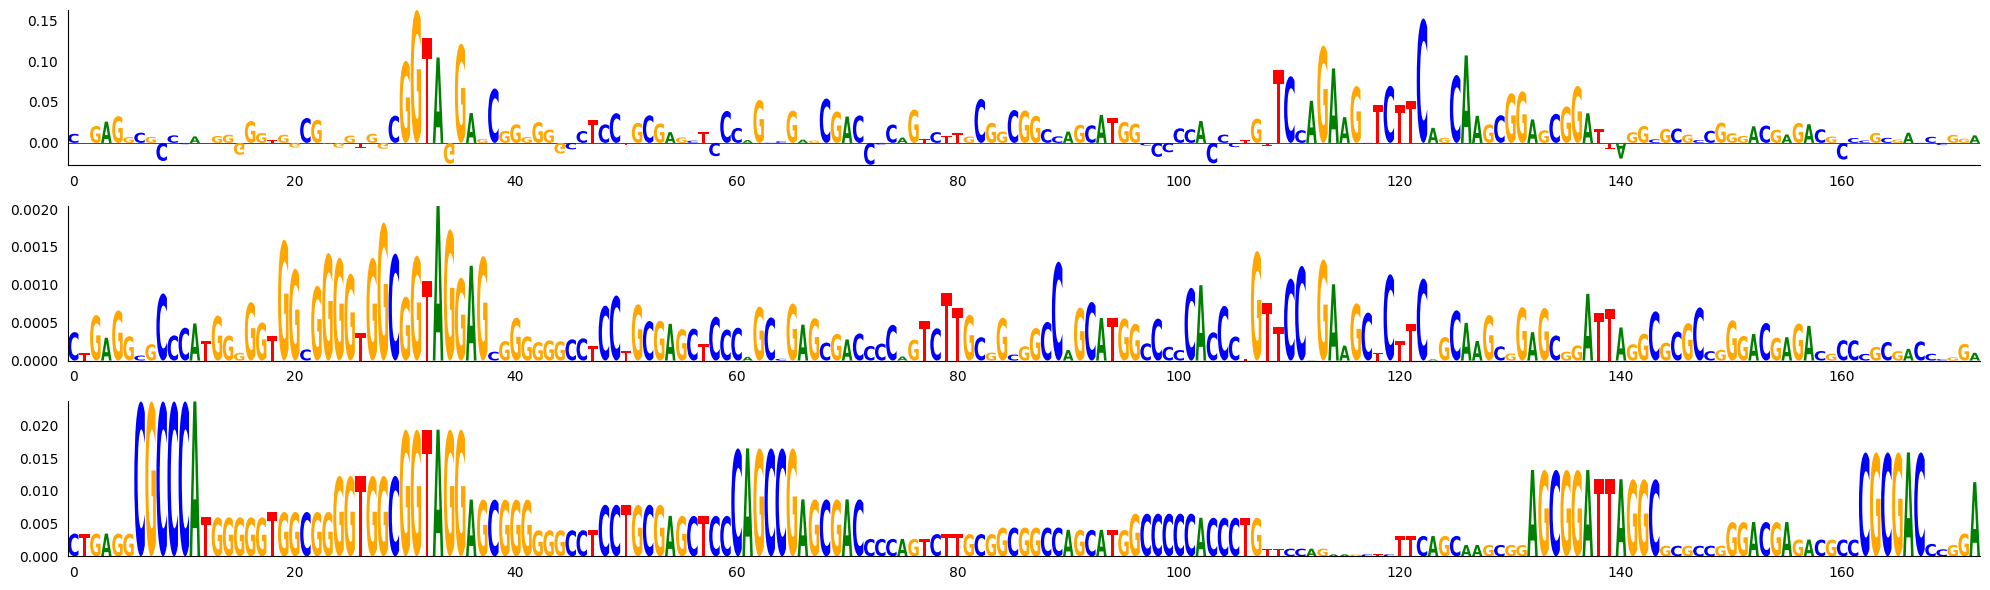

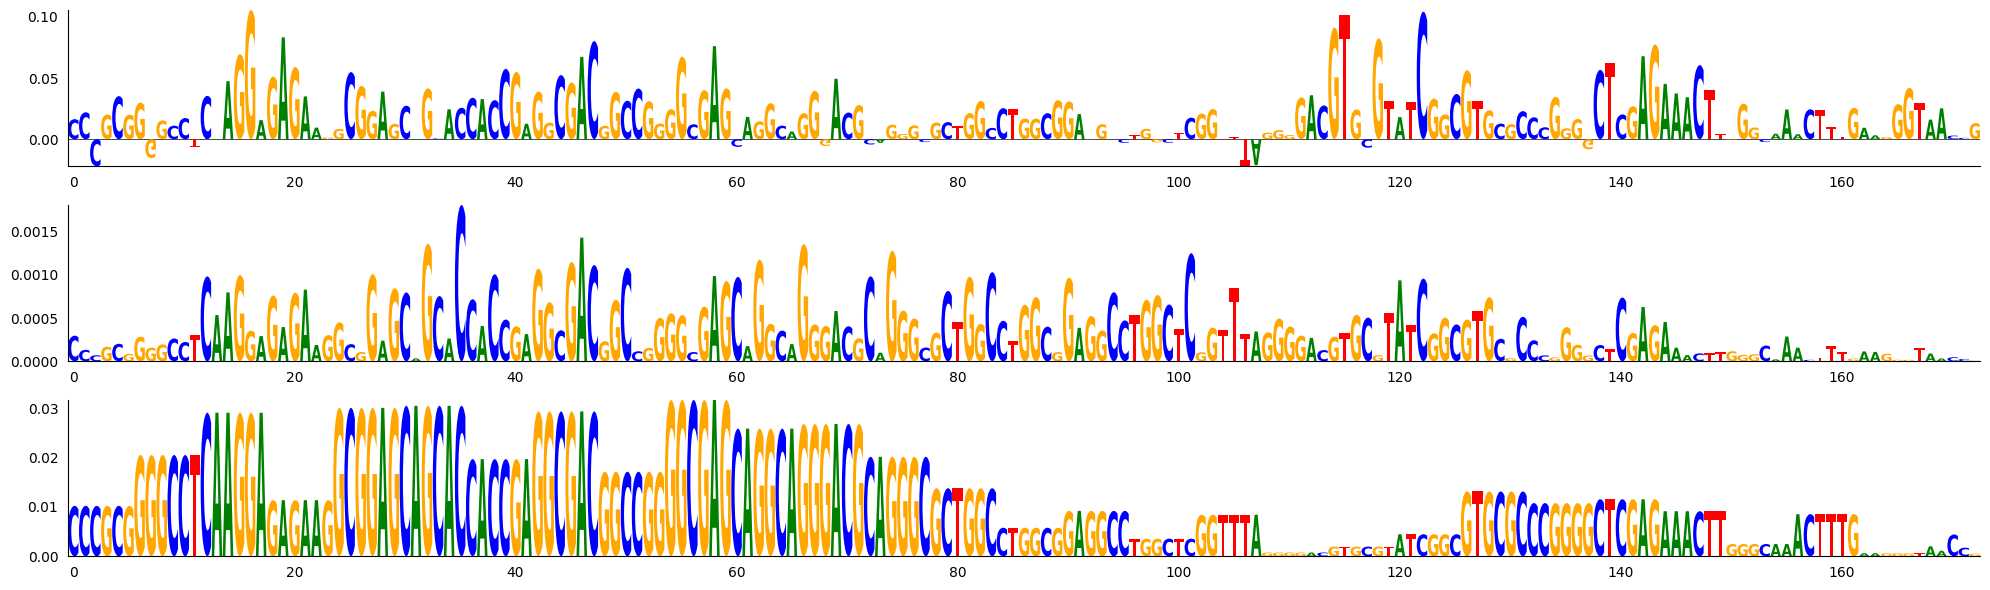

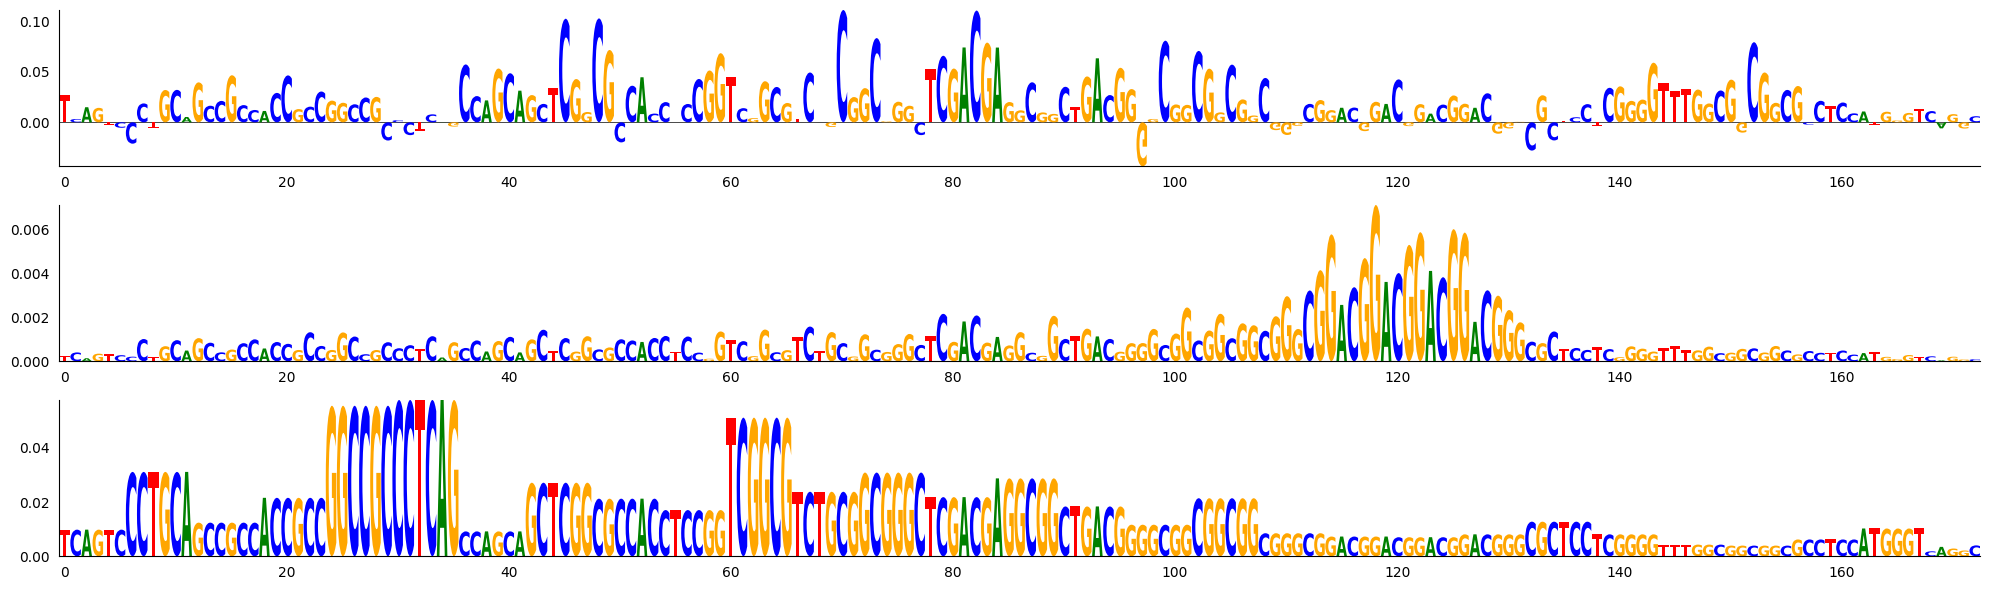

In [10]:
## Insert
count = 5
sal_index = np.random.choice(500,count,replace=False)
#sal_index = range(count)
top_x = np.load('../motif_id/top_seq/insert.npz')['arr_0']
top_x = top_x[sal_index]
top_x = np.swapaxes(top_x,1,2)
plot_collective_saliency(top_x,'_insert.npz',sal_index)

## Correlation Calculation

In [2]:
def correlation_cal(model_1,model_2,saliency_pattern):
    sal_f = '../motif_id/top_saliency/'+model_1+saliency_pattern
    sal_1 = np.abs(np.load(sal_f)['arr_1'])
    sal_f = '../motif_id/top_saliency/'+model_2+saliency_pattern
    sal_2 = np.abs(np.load(sal_f)['arr_1'])

    pr = []
    sr = []
    for i in range(len(sal_1)): 
        pr.append(scipy.stats.pearsonr(sal_1[i],sal_2[i])[0])
        sr.append(scipy.stats.spearmanr(sal_1[i],sal_2[i])[0])

    return pr,sr

In [12]:
ct = 'K562'
pr_gpn,sr_gpn = correlation_cal('CNN','gpn','_lenti_'+ct+'.npz')
pr_nt,sr_nt = correlation_cal('CNN','NT','_lenti_'+ct+'.npz')
print(np.mean(pr_gpn))
print(np.mean(pr_nt))

0.40088943554921763
0.24729279768794987


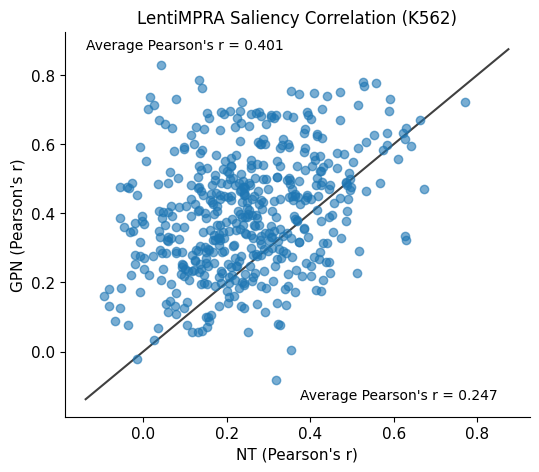

In [14]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
ax.scatter(x = pr_nt, y = pr_gpn,alpha = 0.6)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.title("LentiMPRA Saliency Correlation (K562)")
plt.xlabel("NT (Pearson's r)", fontsize=11)
plt.ylabel("GPN (Pearson's r)", fontsize=11)
ax.text(lims[0],lims[1],"Average Pearson's r = 0.401")
ax.text(lims[1]-0.5,lims[0],"Average Pearson's r = 0.247" )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks(fontsize=11);
plt.xticks(fontsize=11);
plt.savefig('./K562_corr.svg')

In [2]:
pr_gpn,sr_gpn = correlation_cal('CNN','gpn','_insert.npz')
pr_nt,sr_nt = correlation_cal('CNN','NT','_insert.npz')
print(np.mean(pr_gpn))
print(np.mean(pr_nt))

NameError: name 'correlation_cal' is not defined

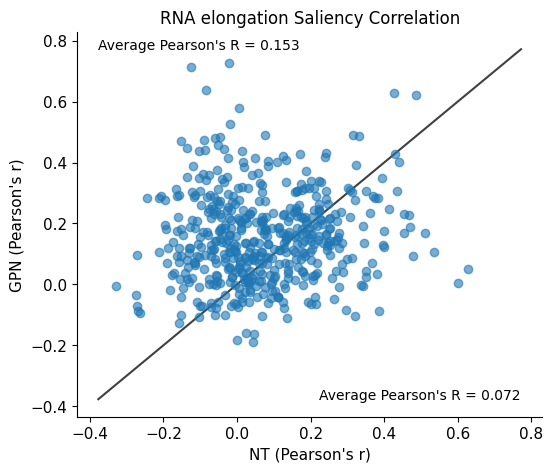

In [5]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
ax.scatter(x = pr_nt, y = pr_gpn,alpha = 0.6)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.title("RNA elongation Saliency Correlation")
plt.xlabel("NT (Pearson's r)", fontsize=11)
plt.ylabel("GPN (Pearson's r)", fontsize=11)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks(fontsize=11);
plt.xticks(fontsize=11);
ax.text(lims[0],lims[1],"Average Pearson's r = 0.153")
ax.text(lims[1]-0.55,lims[0],"Average Pearson's r = 0.072" )
plt.savefig('./insert_corr.svg')